<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [257]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [258]:
df = pd.read_csv("DMV_Written_Tests.csv")

In [259]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

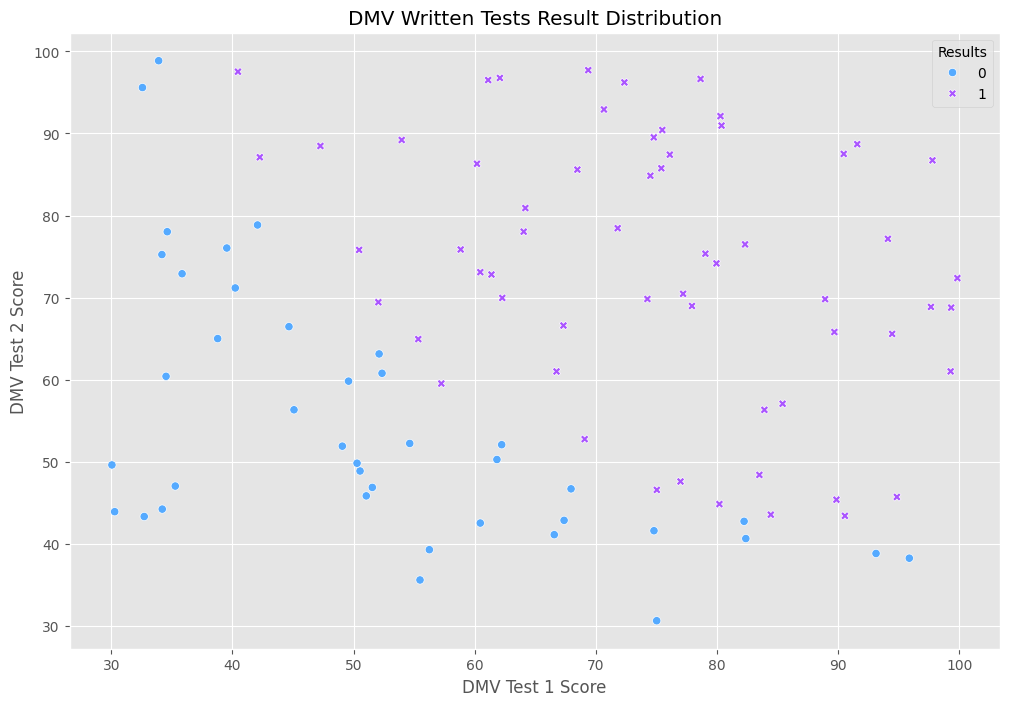

In [260]:
sns.scatterplot(x='DMV_Test_1', y='DMV_Test_2', hue='Results', style='Results', data=df, palette='cool')
plt.title("DMV Written Tests Result Distribution")
plt.xlabel("DMV Test 1 Score")
plt.ylabel("DMV Test 2 Score")
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [261]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [262]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return cost
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

### Task 6: Cost and Gradient at Initialization
---

In [263]:
X = df[['DMV_Test_1', 'DMV_Test_2']].values
y = df['Results'].values
m = len(y)

X = np.hstack((np.ones((m, 1)), X))

theta = np.zeros(X.shape[1])

initial_cost = compute_cost(X, y, theta)
initial_gradient = compute_gradient(X, y, theta)

print("Initial Cost:", initial_cost)
print("Initial Gradient:", initial_gradient)


Initial Cost: 0.6931471805599453
Initial Gradient: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [264]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

alpha = 0.001
iterations = 100000
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print("Optimized Theta:", theta)


Optimized Theta: [-4.81180027  0.04528064  0.03819149]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

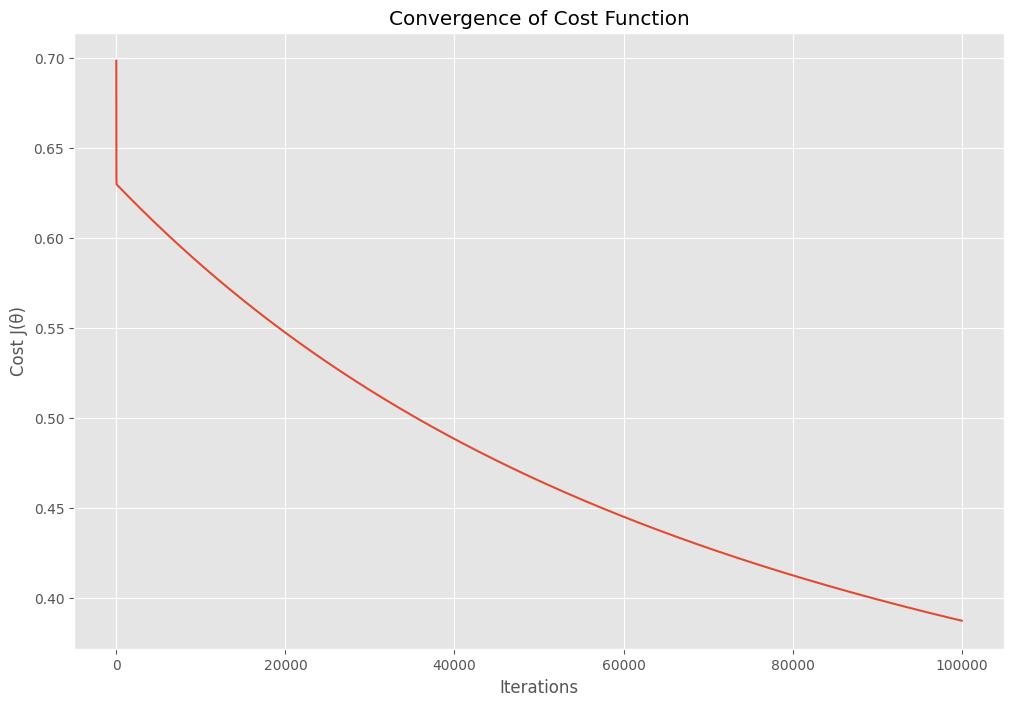

In [265]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost Function")
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

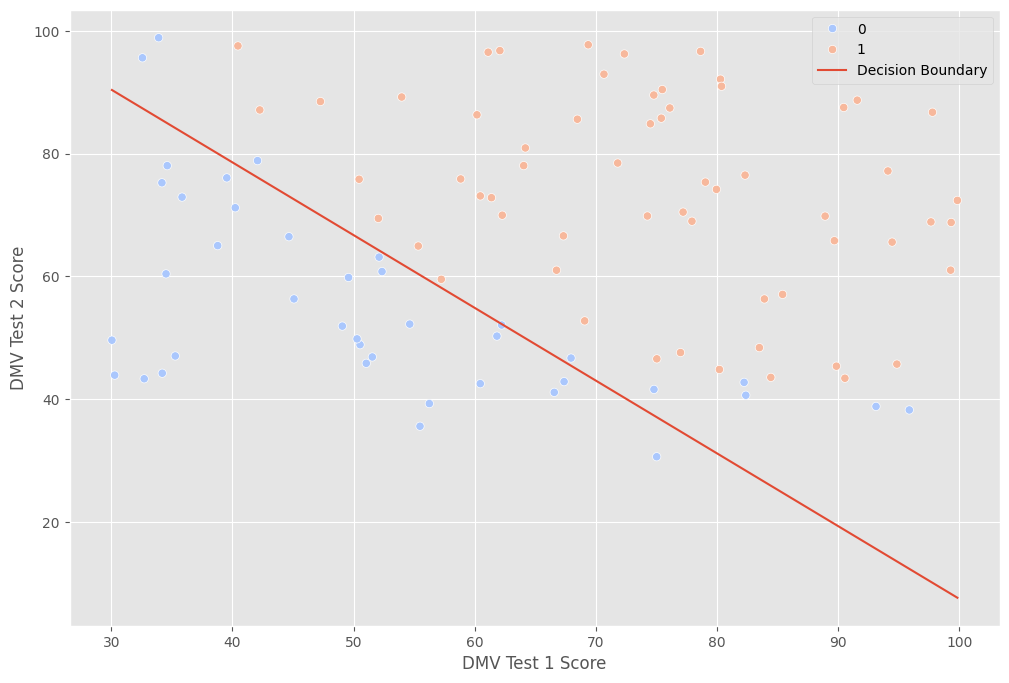

In [266]:
sns.scatterplot(x='DMV_Test_1', y='DMV_Test_2', hue='Results', data=df, palette='coolwarm')

x_values = [X[:,1].min(), X[:,1].max()]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel("DMV Test 1 Score")
plt.ylabel("DMV Test 2 Score")
plt.legend()
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [267]:
def predict(X, theta):
    probability = sigmoid(X @ theta)
    return [1 if p >= 0.5 else 0 for p in probability]

predictions = predict(X, theta)
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 91.00%
